# Classification Analysis
## Import Pakages and Data + Data Investigation

In [41]:
#import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
import seaborn as sns


In [10]:
#Reade data and replace ? with null
data = pd.read_csv('data/breast_cancer.csv')
data.isnull().sum()


Id                  0
Cl.thickness        0
Cell.size           0
Cell.shape          0
Marg.adhesion       0
Epith.c.size        0
Bare.nuclei        16
Bl.cromatin         0
Normal.nucleoli     0
Mitoses             0
Class               0
dtype: int64

In [11]:
data.head(30)

,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,benign
1,1002945,5,4,4,5,7,10.0,3,2,1,benign
2,1015425,3,1,1,1,2,2.0,3,1,1,benign
3,1016277,6,8,8,1,3,4.0,3,7,1,benign
4,1017023,4,1,1,3,2,1.0,3,1,1,benign
5,1017122,8,10,10,8,7,10.0,9,7,1,malignant
6,1018099,1,1,1,1,2,10.0,3,1,1,benign
7,1018561,2,1,2,1,2,1.0,3,1,1,benign
8,1033078,2,1,1,1,2,1.0,1,1,5,benign
9,1033078,4,2,1,1,2,1.0,2,1,1,benign


In [18]:
# split into X and y
y = data['Class']
X = data.drop(['Id', 'Class'], axis=1)

#Impute Missing Values
imp = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imp.fit(X)
transformed_X = imp.transform(X)

In [21]:
# split into training and testing
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.20, random_state=11)
[y_train.size, y_test.size]

[559, 140]

## Boosting
### Adaptive Boosting

In [22]:
#Fit ada boost for plethora of parameters to find best ones
scores_ada = []
for learning in [1, 0.5, 0.25, 0.1, 0.05, 0.01]:
    for n in [1, 2, 4, 8, 16, 32, 64, 100, 200]:
        clf_a = AdaBoostClassifier(n_estimators=n, learning_rate=learning, random_state=0)
        scores_a = cross_val_score(clf_a, transformed_X, y.values.ravel(), cv=5, scoring='roc_auc')
        score = scores_a.mean()
        scores_ada.append([score, learning, n])

In [42]:
#look at average CV scores for each parameter subset
scores_ada_df = pd.DataFrame(scores_ada)
scores_ada_df.columns = ['auc', 'learn_rate', 'n_estimators']
scores_ada_df

,auc,learn_rate,n_estimators
0,0.896938,1.00,1
1,0.963888,1.00,2
2,0.977681,1.00,4
3,0.981895,1.00,8
4,0.990331,1.00,16
5,0.989686,1.00,32
6,0.988189,1.00,64
7,0.987971,1.00,100
8,0.984415,1.00,200
9,0.896938,0.50,1


In [26]:
#Make plots too see how different paramteres affect score
learn_avg = scores_ada_df.groupby('learn_rate', as_index=False).mean()[['learn_rate','auc']]
n_avg = scores_ada_df.groupby('n_estimators', as_index=False).mean()[['n_estimators','auc']]

Text(0.5, 1.0, 'AUC for Different Learning Rate')

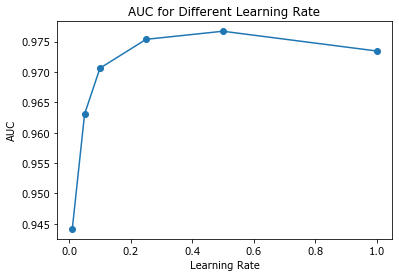

In [27]:
plt.plot(learn_avg.iloc[:,0], learn_avg.iloc[:,1], marker='o')
plt.xlabel("Learning Rate")
plt.ylabel("AUC")
plt.title("AUC for Different Learning Rate")

Text(0.5, 1.0, 'AUC for Different Number of Estimators')

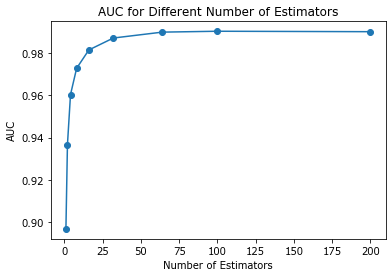

In [28]:
plt.plot(n_avg.iloc[:,0], n_avg.iloc[:,1], marker='o')
plt.xlabel("Number of Estimators")
plt.ylabel("AUC")
plt.title("AUC for Different Number of Estimators")

In [29]:
#find best fit
max_auc = scores_ada_df['auc'].max()
best_fit = scores_ada_df.loc[scores_ada_df['auc'] == max_auc]
best_fit

,auc,learn_rate,n_estimators
44,0.992992,0.05,200


In [30]:
#score best fit against test data
clf_a = AdaBoostClassifier(n_estimators=200, learning_rate=.5, random_state=0)
clf_a.fit(X_train, y_train)
score = clf_a.score(X_test,y_test)
score

0.95

### Gradient Boosting

In [31]:
#Fit gradient boosting for a plethora of parameter subsets to find best subset
scores_grad = []
for depth in [1,2,3,4,5]:
    for learning in [1, 0.5, 0.25, 0.1, 0.05, 0.01]:
        for n in [1, 2, 4, 8, 16, 32, 64, 100, 200]:
            clf_g = GradientBoostingClassifier(n_estimators=n, learning_rate=learning, max_depth=depth, random_state=0)
            scores_g = cross_val_score(clf_g, transformed_X, y.values.ravel(), cv=5, scoring='roc_auc')
            score = scores_g.mean()
            scores_grad.append([score,depth, learning, n])

In [32]:
#look at averages
scores_grad_df = pd.DataFrame(scores_grad)
scores_grad_df.columns = ['auc','depth', 'learn_rate', 'n_estimators']
scores_grad_df

,auc,depth,learn_rate,n_estimators
0,0.896938,1,1.00,1
1,0.967629,1,1.00,2
2,0.984971,1,1.00,4
3,0.986615,1,1.00,8
4,0.989444,1,1.00,16
5,0.989031,1,1.00,32
6,0.988622,1,1.00,64
7,0.987414,1,1.00,100
8,0.985822,1,1.00,200
9,0.896938,1,0.50,1


In [34]:
#make plots to investigate
depth_avg = scores_grad_df.groupby('depth', as_index=False).mean()[['depth','auc']]
learn_avg = scores_grad_df.groupby('learn_rate', as_index=False).mean()[['learn_rate','auc']]
n_avg = scores_grad_df.groupby('n_estimators', as_index=False).mean()[['n_estimators','auc']]

In [35]:
print(depth_avg)
print(learn_avg)
print(n_avg)

   depth       auc
0      1  0.965264
1      2  0.973427
2      3  0.977508
3      4  0.975920
4      5  0.972342
   learn_rate       auc
0        0.01  0.958974
1        0.05  0.969346
2        0.10  0.973148
3        0.25  0.977646
4        0.50  0.980051
5        1.00  0.978188
   n_estimators       auc
0             1  0.940185
1             2  0.954021
2             4  0.964401
3             8  0.972958
4            16  0.978251
5            32  0.982763
6            64  0.986725
7           100  0.987817
8           200  0.988909


Text(0.5, 1.0, 'AUC for Different Tree Depths')

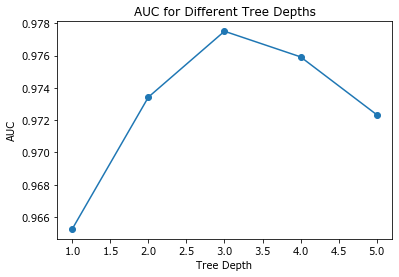

In [36]:
plt.plot(depth_avg.iloc[:,0], depth_avg.iloc[:,1], marker='o')
plt.xlabel("Tree Depth")
plt.ylabel("AUC")
plt.title("AUC for Different Tree Depths")

Text(0.5, 1.0, 'AUC for Different Learning Rate')

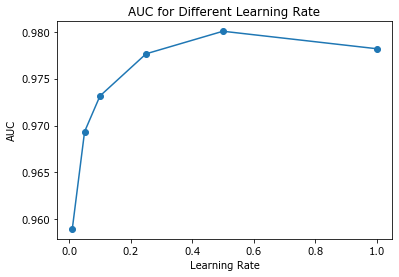

In [37]:
plt.plot(learn_avg.iloc[:,0], learn_avg.iloc[:,1], marker='o')
plt.xlabel("Learning Rate")
plt.ylabel("AUC")
plt.title("AUC for Different Learning Rate")

Text(0.5, 1.0, 'AUC for Different Number of Estimators')

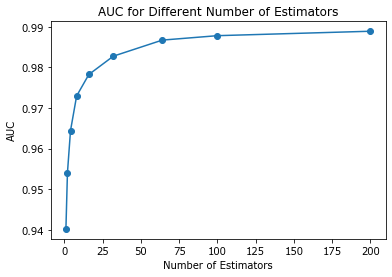

In [38]:
plt.plot(n_avg.iloc[:,0], n_avg.iloc[:,1], marker='o')
plt.xlabel("Number of Estimators")
plt.ylabel("AUC")
plt.title("AUC for Different Number of Estimators")

In [39]:
#find best subset
max_auc = scores_grad_df['auc'].max()
best_fit = scores_grad_df.loc[scores_grad_df['auc'] == max_auc]
best_fit

,auc,depth,learn_rate,n_estimators
24,0.993438,1,0.25,64


In [40]:
#score test data on best subset 
clf_g = GradientBoostingClassifier(n_estimators=64, learning_rate=.25, max_depth=1, random_state=0)
clf_g.fit(X_train, y_train)
score = clf_g.score(X_test,y_test)
score

0.95